In [1]:
import logging
from pathlib import Path

import numpy as np
import pandas as pd
import pyvista as pv

from fenicsxconcrete.util import ureg

from amworkflow.geometry import GeometryCenterline
from amworkflow.meshing import MeshingGmsh
from amworkflow.gcode import GcodeFromPoints
from amworkflow.simulation import SimulationFenicsXConcrete

logging.basicConfig(level=logging.INFO)

%load_ext autoreload
%autoreload 2

# Toy problem for demonstrating the moduls of the AM workflow repo

In [2]:
# initialze parameter dict
params = { }

# define output directory 
OUTPUT_NAME = "toy"
OUTPUT = (
    Path.cwd() / "output_notebook"
) 
OUTPUT.mkdir(parents=True, exist_ok=True)

print(f"result files will be saved in folder: {OUTPUT}")


result files will be saved in folder: /home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook


## 1. Create design by centerline

In [3]:
# set design parameters
params["layer_thickness"] = 10.  # mm
params["height"] = 40.  # mm

# define centerline by points (x,y,z) as list:
points = [[0., 0., 0.],
          [0.,150.,0.],
          [10.,150.,0],
          [75.,75.,0.],
          [140.,150.,0.],
          [150.,150.,0.],
          [150.,0.,0.]]
L = 150
W = 150
t = 20
points = [[0., 0., 0.],
          [0.,(W-t)/2,0.],
          [(L-t/2),(W-t)/2,0.],
          [(L-t/2),-(W-t)/2,0.],
          [0.,-(W-t)/2,0.]]
params["points"] = points

# initialize geometry class
geometry = GeometryCenterline(**params)
# create stp, csv, stl
geometry.create(OUTPUT / f"{OUTPUT_NAME}.stp",  OUTPUT / f"{OUTPUT_NAME}.csv", OUTPUT / f"{OUTPUT_NAME}.stl")

DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 0, 2
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 5, 0
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 2, 3
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 3, 4
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 4, 5
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 8, 11
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 11, 14
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 14, 17
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 17, 19
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 19, 8
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 8, 9
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 9, 20
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 20, 18
DEBUG:amworkflow.geometry.builtinCAD:Creating OCC edge by points: 

[[8, 11, 14, 17, 19], [9, 20, 18, 15, 12]]

*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 2                      ******
** WorkSession : Sending all data
 Step File Name : /home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp(852 ents)  Write  Done


In [4]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp')]


No module named 'trame'

Falling back to a static output.
  warnings.warn(



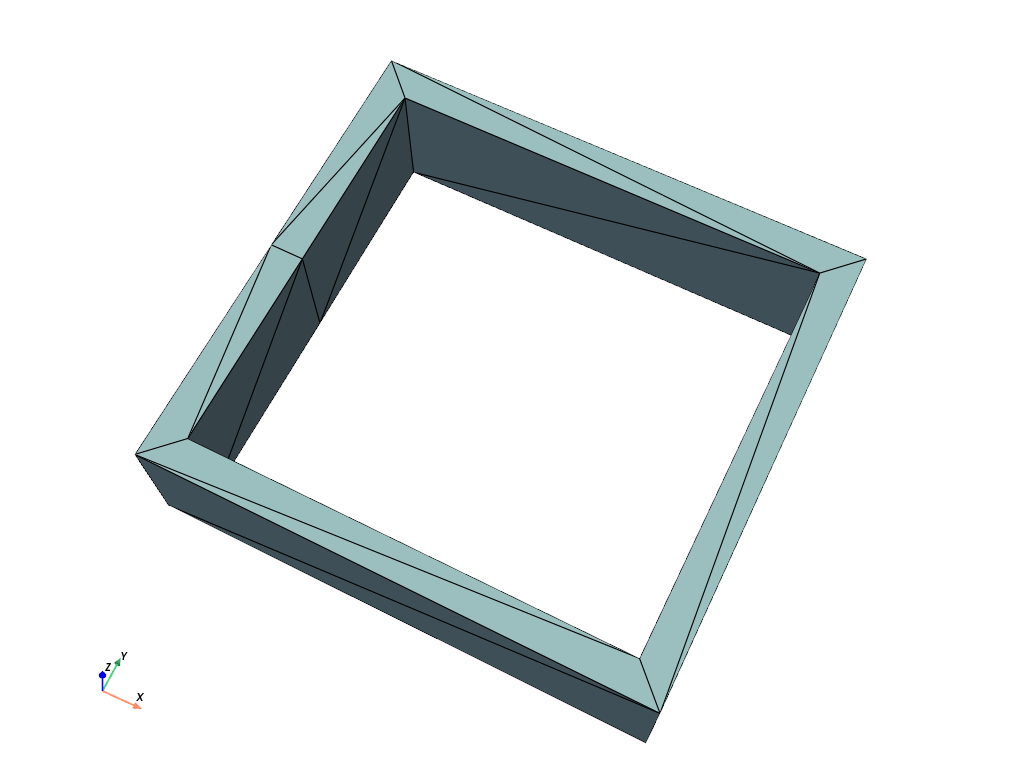

In [5]:
# display stl
mesh = pv.read(OUTPUT / f"{OUTPUT_NAME}.stl")
#mesh.plot(cpos='xy')
mesh.plot(cpos=[1, -2, 5], show_edges=True)

In [6]:
# load saved points:
pd.read_csv(OUTPUT / f"{OUTPUT_NAME}.csv")

,x,y
0,0.0,0.0
1,0.0,65.0
2,140.0,65.0
3,140.0,-65.0
4,0.0,-65.0


## 2. Create gcode from points

In [7]:
# define gcode parameters
#params[""]=...
params["layer_num"] = 4
params["layer_height"] = 10 #mm
params["layer_width"] = params["layer_thickness"]
params["offset_from_origin"] = [0, 0] # Offset from origin in mm
params["unit"] = "mm"    # Unit of the geometry
params["standard"] = "ConcretePrinter"   # Standard of the printer firmware
params["coordinate_system"] = "absolute" # Coordinate system of the printer firmware
params["nozzle_diameter"] = 0.4  # Diameter of the nozzle in mm
params["kappa"] = 1 # Parameter for the calculation of the extrusion width
params["tool_number"] = 0 # Tool number of the extruder. Expected to be an integer
params["feedrate"] = 1800 # Feedrate of the extruder in mm/min. Expected to be an integer
params["in_file_path"] = OUTPUT / f"{OUTPUT_NAME}.csv" # Path to the input file
params["out_gcode_dir"] = OUTPUT # Path to the output file

gcd = GcodeFromPoints(**params)
gcd.create(OUTPUT / f"{OUTPUT_NAME}.csv", OUTPUT / f"{OUTPUT_NAME}.gcode")

-0.021599999999999998
-6000000.000000001


In [8]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/log_toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.gcode'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp')]

In [9]:
with open(OUTPUT / f"{OUTPUT_NAME}.gcode") as f:
    lines = [line for line in f]
print("".join(lines))

; Timestamp: 2024-03-18 14:52:50.281630
; Length: 141.0
; Width: 131.0
; Height: 40
; Layer height: 10
; Layer number: 4
; Line width: 1
; Different geometry per layer: False
; Tool number: 0
; Feed rate: -6000000.000000001
; Kappa: 1
; Gamma: -1
; Delta: 1
; Standard: ConcretePrinter
; Coordinate system: absolute
; Unit: mm
; Nozzle diameter: 0.4
; Material consumption(L): 0.021599999999999998
; Estimated time consumption: 23hr:59min:59sec
; Original point: (0,0)
G90
M82
M106 S0
T0
G1 Z10
G92 E0
G1 X0.0 Y0.0 E0.0 F-6000000.000000001
G1 X0.0 Y65.0 E5172.5357 F-6000000.000000001
G1 X140.0 Y65.0 E16313.3817 F-6000000.000000001
G1 X140.0 Y-65.0 E26658.453 F-6000000.000000001
G1 X0.0 Y-65.0 E37799.299 F-6000000.000000001
G1 X0.0 Y0.0 E42971.8347 F-6000000.000000001
G1 Z20
G92 E0
G1 X0.0 Y0.0 E0 F-6000000.000000001
G1 X0.0 Y65.0 E5172.5357 F-6000000.000000001
G1 X140.0 Y65.0 E16313.3817 F-6000000.000000001
G1 X140.0 Y-65.0 E26658.453 F-6000000.000000001
G1 X0.0 Y-65.0 E37799.299 F-6000000.0

## 3. Create mesh from design

In [10]:
# define mesh parameters
params["mesh_size_factor"] = 1
params["number_of_layers"] =  4

meshing = MeshingGmsh(**params)
meshing.create(OUTPUT / f"{OUTPUT_NAME}.stp",OUTPUT / f"{OUTPUT_NAME}.xdmf",OUTPUT / f"{OUTPUT_NAME}.vtk")

In [11]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/log_toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.h5'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.msh'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.gcode'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.xdmf'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp')]


No module named 'trame'

Falling back to a static output.
  warnings.warn(



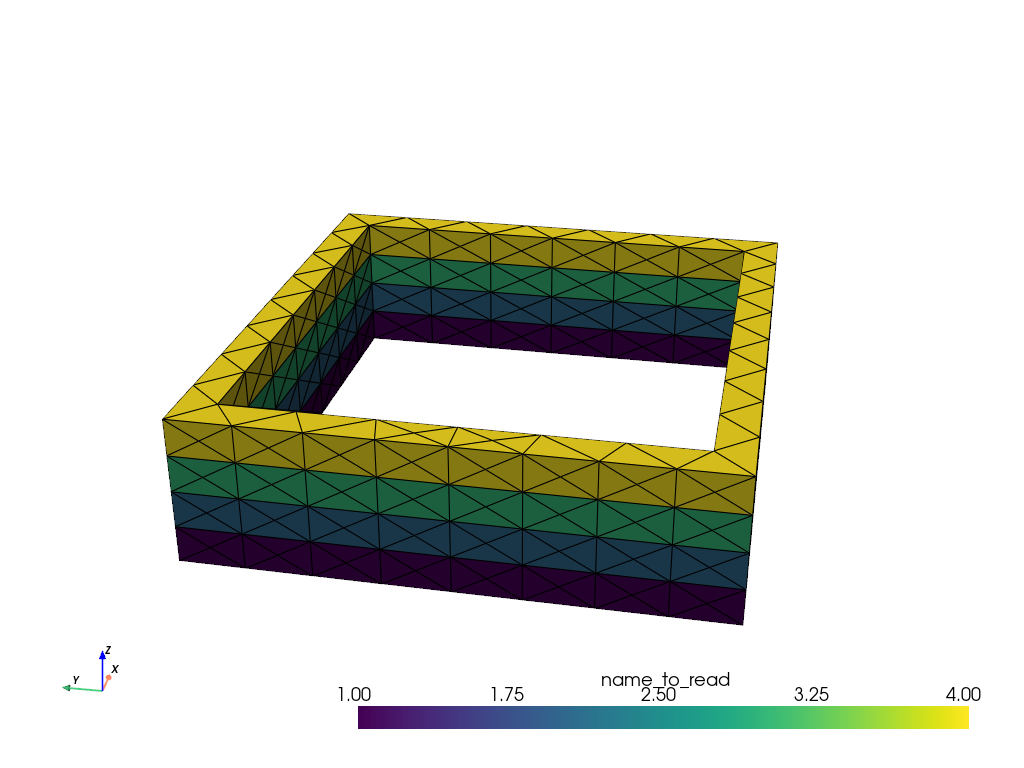

In [12]:
# display xdmf
mesh = pv.read(OUTPUT / f"{OUTPUT_NAME}.xdmf")
#mesh.plot(cpos='xz', show_edges=True)
mesh.plot(cpos=[-10, -2, 5], show_edges=True)

## 4. Run simulation

In [13]:
# define mesh parameters
params_sim_structure = {
    "mesh_unit": "mm" * ureg(""), 
    "dim": 3 * ureg(""),
    "degree": 2 * ureg(""),
    "q_degree": 2 * ureg(""),
    "bc_setting": "compr_disp_y" * ureg(""),
    "rho": 2400 * ureg("kg/m^3"),
    "g": 9.81 * ureg("m/s^2"),
    "E": 33000 * ureg("MPa"),
    "nu": 0.2 * ureg(""),
    "top_displacement": -5.0 * ureg("mm"),
    "material_type": "linear" * ureg(""),
    "experiment_type": "structure" * ureg(""),
    "number_steps": 3 * ureg(""),  # number of steps for simulation
}

simulation = SimulationFenicsXConcrete(params_sim_structure)
simulation.run(OUTPUT / f"{OUTPUT_NAME}.xdmf", OUTPUT / f"{OUTPUT_NAME}_sim_structure.xdmf")

Volume of design 0.0002159999999999908
bc points:  -0.0050000000000000044 -0.07 0.0 and 0.145 -0.07 0.0
d_disp -1.6666666666666667 millimeter
computed disp step: 0, u_max=0.00030569176916138484, u_min=-0.0016712268375900583
d_disp -3.3333333333333335 millimeter
computed disp step: 1, u_max=0.000611383483346828, u_min=-0.003342453656403266
d_disp -5.0 millimeter
computed disp step: 2, u_max=0.000917075197533111, u_min=-0.0050136804752164655
force_x_y_z [[ 1.18699361e-09 -3.20780309e+05 -3.20780309e+05]
 [ 1.66208736e-09 -6.41558074e+05 -6.41558074e+05]
 [ 4.21162838e-09 -9.62335840e+05 -9.62335840e+05]] newton
equivalent modulus 1283.1144534346174 / meter
         disp_x    disp_y        disp_z       force_x        force_y  \
0 -2.541662e-09 -0.001667  4.046008e-10  1.186994e-09 -320780.308527   
1 -5.192740e-09 -0.003333  4.201353e-10  1.662087e-09 -641558.074301   
2 -7.843818e-09 -0.005000  4.356699e-10  4.211628e-09 -962335.840076   

         force_z  
0 -320780.308527  
1 -641558.

In [14]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy_sim_structure.xdmf'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/log_toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.h5'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy_sim_structure.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.msh'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.gcode'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.xdm


No module named 'trame'

Falling back to a static output.
  warnings.warn(



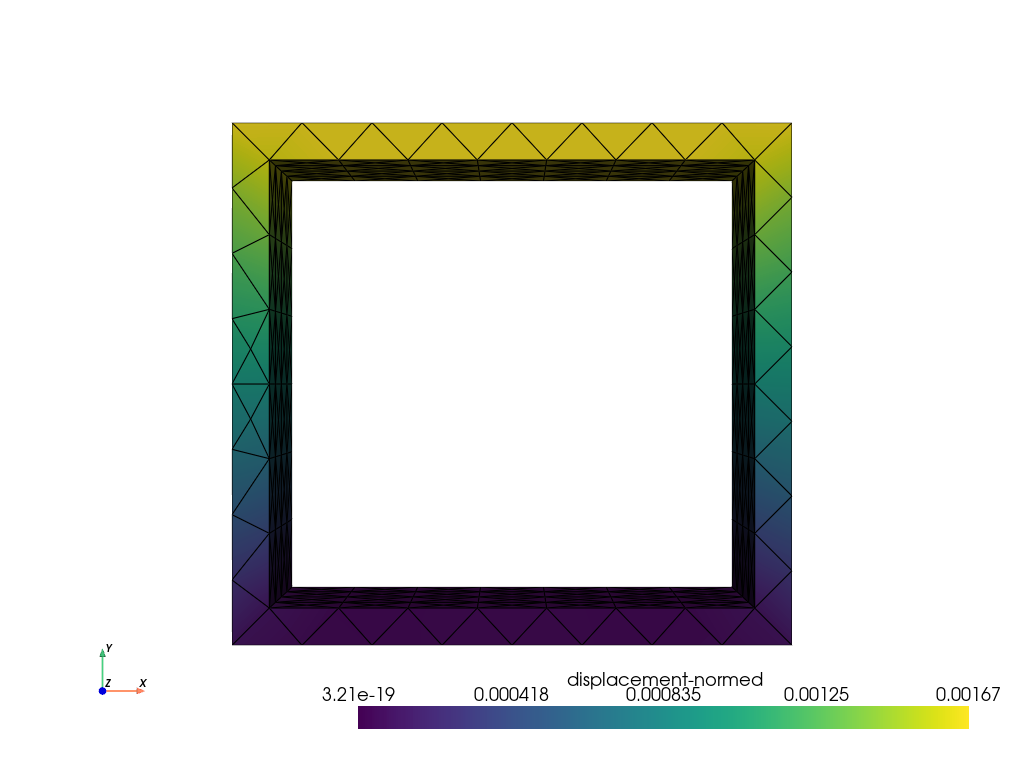

In [15]:
# display xdmf
mesh = pv.read(OUTPUT / f"{OUTPUT_NAME}_sim_structure.xdmf")
#mesh.plot(cpos='xz', show_edges=True)
#mesh.plot(cpos=[-10, -2, 5], show_edges=True, scalars="displacement")
mesh.plot(cpos='xy', show_edges=True, scalars="displacement")